Date started: 11 July 2015,
Date completed: 18 July 2015

This notebook contains all the computations that I ran to solve questions from Assignments number 2 of the Coursera Introduction to Finance Course. I may not note down my work for every single question, but for those that I find particularly difficult and noteworthy, I will also paste the question here followed by my code statements to solve the question. I will be mainly using functions from a module which I have written that sits in the same folder as where all the notebooks are stored. If the question requires an ad-hoc calculation for which I have no function coded for that, I will express the statements for the calculations directly here in this notebook.

In [1]:
from functions import *
from decimal import Decimal, getcontext  
getcontext().prec = 20

### Question 1

#### Carlos goes to the bank to take out a personal loan. The stated annual interest rate is 6%, but interest is compounded semi-annually and he will make monthly payments. What is the EAR?

To answer this question, I must be familar with the concepts of stated interest rate (also known as quoted interest rate) and effective annual rate (EAR). Professor did briefly explain these concepts in his lecture video class 2.8, but it wasn't enough for me to solve this question. So I consulted textbook *Corporate Finance Fundamentals, 8th Edition* by Ross, Westerfield and Jordon. 

My first attempt at solving this question landed in failure as I attempted to blindly convert the interest rate of 6% compounded semi-annually to become an interest rate of (6/6)% compounded monthly. Basically I was directly trying to follow the Professor in the lecture where he converted an interest rate of 10% compounded monthly to an interest rate that compounded once a year (every 12 months), and therefore did the division by 6 since semi-annually is twice a year, which would be six months. Plugging in my wrong values yielded an erroneous result of 6.15%. 

So I consulted the textbook and on pages 165 to 167, both types of interest rates got clearly defined, and illustrated with examples. I quote some paragraphs as follows:

"...rates are quoted in many different ways. Sometimes the way a rate is quoted is the result of tradition, and sometimes it's the result of legislation. Unfortunately, at times, rates are quoted in deliberately deceptive ways to mislead borrowers and investors."

"If a rate is quoted as 10% compounded semi-annually, this means the investment actually pays 5% every six months. A natural question then arises: Is 5% every six months the same thing as 10% per year? It's easy to see that it is not. If you invest $\$$1 at 10% per year, you will have $\$$1.10 at the end of the year. If you invest at 5% every 6 months, then you'll have the future value of $1 at 5% for 2 periods to be:"

$$\$1 * 1.05^2 = \$1.1025 $$

"This is $\$0.0025$ more. The reason is simple: Your account was credited with $\$1 * 0.05 = 5$ cents in interest after 6 months. In the following 6 months, you earned 5% on that nickel, for an extra 5 $*$ 0.05 = 0.25 cents" 

*Remember how compounding works? At the second half of the year when compounding occurs again, the interest rate is applied to both the interest of 5 cents earned in the 1st half of the year as well as the principal amount. So I see that because semi-annual compounding causes interest to be compounded twice within a single year, the interest earned in semi-annual compounding (done twice in a year) within a period of 1 year will be greater than that earned by pure annual compounding at the same **quoted** interest rate.* Continuing on the quote from the textbook:

"As our example illustrates, 10% compounded semi-annually is actually equivalent to 10.25% per year... Anytime we have compounding **during** the year, we need to be concerned about what the rate really is."

"In our example, the 10% is called a **stated, or quoted, interest rate**. The 10.25%, which is actually the rate you will earn, is called the **effective annual rate (EAR)**. To compare different investments or interest rates, we will always need to convert to effective rates." 

With the formal definition of EAR to be "the interest rate **expressed** as if it were compounded **once** per year", and a generalization of the calculation steps from a few more examples, we are given the equation:

$$ EAR = [1 + (\text{Quoted rate}/m)]^m - 1 $$

Where *m* is the number of times the interest is compounded **within 1 year**, as it corresponds to the quoted rate. For example, if I am given a rate quoted to be 15% compounded **daily**, then *m = 365* since 1 year is 365 days and within an entire 1 year period, that will be the toal number of times the interest of 15% will get compounded. Likewise, if my quoted rate is 15.5% compounded **quaterly**, then *m = 4*.

In [2]:
# Solution for Question 1
print effective_annual_rate(qr = 6, m =2)

6.0900


So the answer is 6.09%.

### Question 5

#### Huiling owns a rental property on Main street, but she is considering selling the property to another real estate investor. In preparation for negotiating a price, Hueling wants to know the value of the property. The Net Operating Income (NOI) is the cash flow from real estate and the Cap Rate is the rate, where NOI is rental revenue less all expenses except loan servicing. The property has an NOI of $\$$11,000 per year. The local real estate market has a cap rate of 7%. What is a fair price for the property assuming that the building's life is 35 years? (Enter just the number in dollars without the $ sign or a comma and round off decimals.)

There are some interesting concepts in physical capital assets here that I will fill up in the notes when I have time... otherwise, this question is a simple PV of an annuity calculation as follows:

In [3]:
present_value(r=7, n=35, pmt = 11000)

Decimal('142424.39530474029537')

### Question 6

#### Melanie and Stephen Jackson are purchasing their first house. The house costs $210,000. They have put a 15% down payment (that is, an amount that banks should require you to pay out-of-pocket), but will therefore finance the rest. They are considering a fixed rate 30-year mortgage at a 5.75% APR with monthly payments. How much will the Jacksons' first monthly payment be?

Note that since they have already put in 15% downpayment, they only need to mortgage the remaining 85% of their house to pay it back. We know that the total number of periods as given is 30 years. My original solution to this question was immediately wrong as I did not take note that the payments had to be *monthly*. But even if I had taken note of the point on *monthly* payments, I would still have been baffled by the term **APR**. What is APR? Quoting from the textbook:

"Truth-in-lending laws in the United States require that lenders disclose an APR on virtually all consumer loans. This rate must be displayed on a loan document in a prominent and unambiguous way."

"... an obvious question arises: Is an APR an effective annual rate? Put another way, if a bank quotes a car loan at 12% APR, is the consumer actually paying 12% interest? Surprisingly, the answer is no."

"By law, the **APR** is simply equal to * **the interest rate per period** multiplied by **the number of periods in a year***. For example, if a bank is charging 1.2% per month on car loans, then the APR that must be reported is 1.2% $*$ 12 = 14.4%.... So, an APR of 12% on a loan calling for monthly payments is really 1% per month."

The definition of APR then is **the interest rate charged per period mutiplied by the number of such periods that exists within a year**. The APR is just a convention for normalizing the representation of interest rates regardless of the frequency at which they may be compounded or discounted.

Taking this theory back into context in our question, since the given APR = 5.75%, and we know that payments will be done monthly, to calculate the cost of each monthly payment (which we assume to be constant throughout time period), we can find the monthly interest rate, along with the total amount of the mortgage that has to be repaid. 

In [181]:
r_month = Decimal(5.75/12)
mtg = Decimal(210000*0.85)
print r_month
print mtg

0.479166666666666685170383743752609007060527801513671875
178500


And now we apply our function to find monthly payments, with the $PV$ being the mortgage amount itself, since the loan is taken out right now in present time to pay for the house. Total number of periods has to be converted from years to months too since interest rate is now a monthly rate.

In [182]:
pmt_month = payment(r=r_month, n=30*12, pv=mtg)
print pmt_month

1041.6775487517419491


And there we have our answer to be $1041.68.

All these funny ways to express interest rates had really tripped me up in this question, so I also decided to go further and consider another case that wasn't in the question. If the payments had to be made yearly instead, how much would it be? Furthermore, would the $FV$ if the payment had been made yearly be different from if the payment was monthly? Going by conceptual intuition, the $FV$ should be the same regardless of whether the payments are monthly or yearly. This is becasue the interest rate and the total time period should consistent between both cases since we would be simply converting between a montly and yearly rate, and $PV$ is the constant. Nonetheless, I had to work it out to convince myself and verify that my understanding is correct.

The first step to find interest rate for the case of yearly payments is to actually convert the APR of 5.75% to an EAR. Quoting from the book:

"So, an APR is in fact a quoted, or stated, rate in the sense we've been discussing. For example, an APR of 12% on a loan calling for monthly payments is really 1% per month. The EAR on such a loan is thus:"

$$ 
\begin{equation}
\begin{split}
EAR & = [1+ (APR/12)]^{12} - 1 \\
 & = 1.01^{12} -1 \\
 & = 12.6825%
\end{split}
\end{equation}
$$

So we will find EAR for the APR (which was actually derived from a monthly rate) of 5.75% that we were given in the question, and the use it in our calculation of the yearly payments. Total time period now should be in years, so $n=30$.

In [183]:
r_ear = effective_annual_rate(qr = 5.75, m=12)
print r_ear
pmt_yr = payment(r=r_ear, n=30, pv = mtg) 
print pmt_yr

5.9039831281596822600
12834.880012827170396


So we have found the yearly payment to be $\$$12834.88, which is much larger than the monthly payments! Let us now find the $FV$ using both the monthly and yearly payments to see if they indeed give the same $FV$.

In [184]:
fv_month = future_value(r=r_month, n = 30*12, pmt=pmt_month)
fv_yr = future_value(r=r_ear, n=30, pmt=pmt_yr)
print fv_month
print fv_yr

997716.27618801569437
997716.27618801562134


And clearly, we arrive at the very same $FV$ at the 'same' interest rate regardless of whether we make monthly or yearly payments! The theory is consistent and I have verified my understanding!

### Question 8

#### Two years ago Abilia purchased a $\$$13,000 car; she paid $2,500 down and borrowed the rest. She took a fixed rate 60-month installment loan at a stated rate of 7.0% per year. Interest rates have fallen during the last two years and she can refinance her car by borrowing the amount she still owes on the car at a new fixed rate of 4% per year for 3 years. Should Abilia refinance her loan? How much will she save per month for the remainder of the loan life if she decides to refinance?

Initially I mistakenly identified this question to be an $FV$ problem. However, I did get the gist of an important bulk of the question correct to be asking whether Abilia should, after 2 years have passed, take a new loan contract to replace her current contract, to possibly take advantage of more favorable terms. However, I misinterpreted the question to believe that the decision to do so hinges on whether the refinancing could result in a smaller cumulative total payment (than sticking to the original loan contract) by the end of the loan payment, when actually the comparison we should be making is between each monthly payment for both cases. Ultimately, yes it is true that a more favorable contract would result in a smaller cumulative total payment (combining both interest and principal repayment), but the question is not asking for the differences in cumulative total payments between the two contracts. Its asking for the differences in the monthly $PMT$.

So for the first step, we need to find out what is the monthly payment under the original loan contract:

In [185]:
car_loan_amt = Decimal(13000-2500)
r_month = Decimal(7)/Decimal(12) # This is the monthly rate of the original loan
pmt_original_month = payment(r=r_month, n=60, pv=car_loan_amt)
print pmt_original_month

207.91258467367011767


Note that when calculating the r_month variable, I need to apply the Decimal() conversion to the numerator, Decimal(7), and denominator, Decimal(12), individually. If I did not do that and instead applied the conversion on the entire fraction as Decimal(7/12), I would actually get the result to the very perplexing 0, because 7/12 itself will be forced to give me an integer result of 0. I got stuck with that for a while... Be very careful with numerical computations!

Using that monthly payment, we can then find the loan balance after 2 years have passed:

In [186]:
# Since we know that two years is 24 months, find the loan balance 
# after two years have passed as a PV, as what was taught to us in 
# lecture 2.7
loan_bal_2years = present_value(r=r_month, n=60-24, pmt=pmt_month)
print loan_bal_2years

33736.252902712580645


Now we know the remaining loan balance after two years, so we can do the calculations for refinancing it. Seeing that the refinancing terms were given in yearly basis, we need to do a bit of conversion in order to compute the refinancing payments to be in monthly terms:

In [187]:
r_refin_month = Decimal(4)/Decimal(12)
pmt_refinance_month = payment(r=r_refin_month, n=36, pv=loan_bal_2years)
print pmt_refinance_month

996.02862488677298322


Compare the monthly payments under the old contract and the new refinancing contract. It is known and assumed that monthly payments would be constant so that this makes it possible for us to make the comparison.

In [188]:
print pmt_refinance_month - pmt_original_month

788.11604021310286555


We can see that the monthly payments under the new refinance terms are smaller than under the original terms by $\$$9.11, so it is wise for Abilia to save $\$$9.11 every month by carrying out the refinancing.

### Question 9

#### You have been living in the house you bought 5 years ago for $\$$300,000. At that time, you took out a loan for 80% of the house at a fixed rate 20-year loan at an annual stated rate of 9.0%. You have just paid off the 60th monthly payment. Interest rates have meanwhile dropped steadily to 3.5% per year, and you think it is finally time to refinance the remaining balance. But there is a catch. The fee to refinance your loan is $4,500. Should you refinance the remaining balance? How much would you save/lose if you decided to refinance?

My first attempt at this question failed to give any answer that matched the choices. I tried coming at it from the perspective of $FV$, initially convinced that the solution would be to compute the $FV$ for both cases, the original contract, as well as the refinanced contract, and the contract that gives a smaller $FV$ would be the better choice that gives savings. However, it turns out that this is wrong again! I still don't really understand why I can't compare in terms of $FV$ for this question, but I'm starting to get the drift that whenever we are talking about loans and making repayments, decisions that we have to make in the present, such as our question here asking us to decide whether to refinance now or not, we should be finding $PV$. It is mainly in cases where we are concerned with outcomes in the future, such as the result of investments which we have already made in the present, that we find $FV$. Basically I was trying to look at things from the perspective of the bank, for what is a loan to us, could be considered as an investment to them right? I mean the bank could be looking at the FV as the total amount it would be receiving from me as loan repayment by the end of the period, and the choice that gives the bank a larger $FV$ at the end would be the choice that is worse off for me, right? I shall try to figure that out over time.

So ok, my attempt at finding $FV$ and treating it as cumulative payment made all the way at the end failed to answer this question. I then attempted another approach by comparing the total interest which I would have paid in both cases by, after finishing my 60 month payment, either sticking to the original loan contract or changing to the new refinanced contract. To achieve this, I simply subtracted total repayments made between 60th to the 240th month (end of 20 years) away the remaining principal (ie. the loan balance) owed after making the 60th month payment under the old contract, thereby giving me the total interest payments made under both contracts that I can compare. I thought this would work but somehow my final answer was off by a great deal and matched none of the choices... 

Eventually I trawled through the forums looking for help and finally found a solution by Kumar A Mandal https://class.coursera.org/introfinance-009/forum/thread?thread_id=37#post-561 that made good sense and I followed it. The main gist of it is to basically find the cost of monthly payment under the refinancing contract and find the difference of that with the original contract to get the monthly savings I could obtain by doing refinancing. I would then find the PV of all these savings and subtract that by the refinancing fee to get the total savings as my final result. Here's the timeline diagram by Kumar:

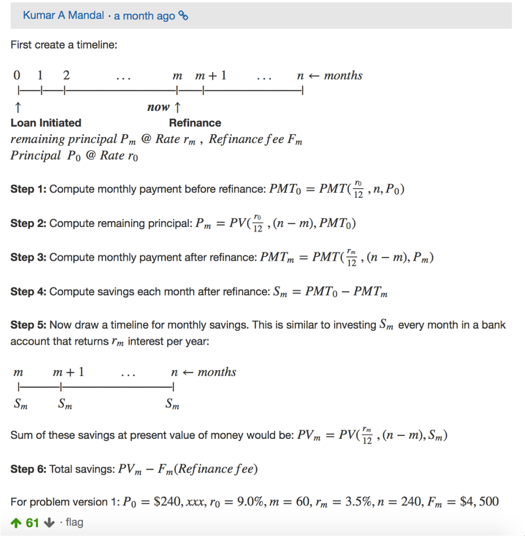

In [189]:
from IPython.display import Image
Image(filename='./images/assignment2_question9.png') 

Firstly, we find the monthly payment before based on original contract:

In [190]:
orig_rate = Decimal(9)/Decimal(12)
loan_amt = Decimal(300000)*Decimal(0.8)
print loan_amt
pmt_orig_month = payment(r=orig_rate, n=240, pv=loan_amt)
print pmt_orig_month

240000.00000000001332
2159.3422940404154113


Then we compute the loan balance, ie. the remaining principal which we still have left to pay back after the 60th month payment:

In [191]:
loan_bal_60m = present_value(r=orig_rate, n=240-60, pmt=pmt_orig_month)
print loan_bal_60m

212896.91761115736007


Now we find the monthly payment under refinacing terms:

In [192]:
refin_rate = Decimal(3.5)/Decimal(12)
pmt_refin_month = payment(r=refin_rate, n=240-60, pv=loan_bal_60m)
print pmt_refin_month

1521.9628950599275391


Compute the savings each month due to refinance, and find the sum of all these savings at present value of money less the refinancing fee, which must be subtracted from all the savings as a one time penalty:

In [193]:
sav_monthly = pmt_orig_month - pmt_refin_month
print sav_monthly
total_sav = present_value(r=refin_rate, n=240-60, pmt=sav_monthly) - 4500
print total_sav

637.3793989804878722
84658.618670828282813


However one thing here I still do not understand is why we used the refinanced loan rate of 3.5% per year as the interest rate to compute present value of the sum of the savings? Why not the interest rate of the original loan terms?

And we find that it is indeed better to do the refinancing as we will reap total savings of $84658.62. 

### Question 10

#### You are interested in a new Ford Taurus. After visiting your Ford dealer, doing your research on the best leases available, you have three options. (i) Purchase the car for cash and receive a $\$$1,900 cash rebate from Dealer A. The price of the car is $\$$19,000. (ii) Lease the car from Dealer B. Under this option, you pay the dealer $\$$550 now and $\$$225 a month for each of the next 36 months (the first $\$$225 payment occurs 1 month from today). After 36 months you may buy the car for $\$$10,900. (iii) Purchase the car from Dealer C who will lend you the entire purchase price of the car for a zero interest 36-month loan with monthly payments. The car price is $\$$19,000. Suppose the market interest rate is 4%. What is the net cost today of the cheapest option? (Enter just the number in dollars without the $ sign or a comma and round off decimals.)

##### My first attempt that didn't work out:

This question asks for the cheapest option, and the cost of that option **today**, so my solution must be worked back to present values. I will approach this question option by option.

##### Dealer A

In [194]:
cost_A = Decimal(19000) - Decimal(1900)
print cost_A

17100


##### Dealer B

Buying from B involves 3 steps, (1) Pay lump sum $\$$550 today, then (2) pay $\$$225 per month for 36 months, finally (3) pay lump sum $\$$10900 after the 36 months.

There are two present value computations I need to find here, which is the sum of the present values for the $\$$225 payments for 36 months, and the present value of the single cash flow of $\$$10900 discounted backwards for 36 months too.

In [195]:
# Given the interest rate as 4%
pv_monthly_payments = present_value(r=4, n=36, pmt=225)
pv_final_payment = present_value(r=4, n=36, fv=10900)
# Total cost of buying from B
cost_B = Decimal(550) + pv_monthly_payments + pv_final_payment
print cost_B

7460.3525077754418530


##### Dealer C

Since the dealer is leasing the car out to us at a 0% interest rate loan with equal monthly payments, and we are given the price of the car to be $\$$19000, then present value of the cost of the option from C is simply $\$$19000.

Answering the question, the cheapest option is (ii) from Dealer B at $7460.

After submitting this result online, it turns out that I got it wrong. So now here's my second attempt again, this time with help from the online forums.

##### My second attempt

I've verified that my response for option (i) Dealer A is correct, and concetpually my understanding of Dealer B's offer is correct. But the careless mistake I made for Dealer B was that I did not convert the market interest rate, which is per year, into a monthly rate!!! Redoing the calculation for B:

In [196]:
r_month = Decimal(4)/Decimal(12)
pv_monthly_payments = present_value(r=r_month, n=36, pmt=225)
pv_final_payment = present_value(r=r_month, n=36, fv=10900)
# Total cost of buying from B
cost_B = Decimal(550) + pv_monthly_payments + pv_final_payment
print cost_B

17840.284598198162316


Now C is the tricky one! While it is true that the monthly payments for the loan from Dealer C is at 0%, this does not mean that the **time value of money** is not in force. The market rate of 4% per year still works to cause each and every monthly payment to be worth *less than the previous month's*! While the monthly payments to Dealer C will simply be the current price of the car ($19000) divided by the 36 months equally, I still have to find the sum of the present values of all these monthly payments I make to Dealer C, discounted at a rate of 4%.

In [197]:
pmt_C = Decimal(19000)/Decimal(36)
print pmt_C
cost_C = present_value(r=r_month, n=36, pmt=pmt_C)
print cost_C

527.77777777777777778
17876.237833593210214


So thinking back to the option by Dealer B, for the monthly payments with B, actually it was not stated whether there would be interest rate or not. But I was right to apply the 4% per year interest rate (converted into monthly), so I guess the assumption is that if no other interest rates are offered by the dealer, then the market rates prevail. So Dealer C is a fool for not demanding any interest on the loan repayments!

And it is clear that the offer from Dealer A, at $17100, is the best deal, which is the correct answer!